In [1]:
#importing necessary packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [2]:
# lets import the dataset
telecom = pd.read_csv(r"C:\Users\LENOVO\Downloads/telecom_churn_data.csv")
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
# dimensions of the dataset
telecom.shape

(99999, 226)

In [4]:
## percentage of missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

mobile_number     0.00
circle_id         0.00
loc_og_t2o_mou    1.02
std_og_t2o_mou    1.02
loc_ic_t2o_mou    1.02
                  ... 
aon               0.00
aug_vbc_3g        0.00
jul_vbc_3g        0.00
jun_vbc_3g        0.00
sep_vbc_3g        0.00
Length: 226, dtype: float64

In [5]:
# creating new columns by grouping
idcols = ['mobile_number', 'circle_id']

datecols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]

catcols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]

numcols = [column for column in telecom.columns if column not in idcols + datecols + catcols]

# number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(idcols), len(datecols), len(numcols), len(catcols)))

# checking for missing columns
print(len(idcols) + len(datecols) + len(numcols) + len(catcols) == telecom.shape[1])





#ID cols: 2
#Date cols:12
#Numeric cols:204
#Category cols:8
True


In [6]:
#missing values
total = pd.DataFrame(telecom.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(telecom.isnull().sum()/telecom.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
count_rech_2g_6,74846,74.85
date_of_last_rech_data_6,74846,74.85
count_rech_3g_6,74846,74.85
av_rech_amt_data_6,74846,74.85
max_rech_data_6,74846,74.85
...,...,...
last_day_rch_amt_6,0,0.00
last_day_rch_amt_7,0,0.00
last_day_rch_amt_8,0,0.00
last_day_rch_amt_9,0,0.00


In [7]:
#% of missing values
pd.set_option('display.max_rows', total.shape[0]+1)
print(percentage)


                          Percentage
count_rech_2g_6                74.85
date_of_last_rech_data_6       74.85
count_rech_3g_6                74.85
av_rech_amt_data_6             74.85
max_rech_data_6                74.85
total_rech_data_6              74.85
arpu_3g_6                      74.85
arpu_2g_6                      74.85
night_pck_user_6               74.85
fb_user_6                      74.85
arpu_3g_7                      74.43
count_rech_2g_7                74.43
fb_user_7                      74.43
count_rech_3g_7                74.43
arpu_2g_7                      74.43
av_rech_amt_data_7             74.43
max_rech_data_7                74.43
night_pck_user_7               74.43
total_rech_data_7              74.43
date_of_last_rech_data_7       74.43
night_pck_user_9               74.08
date_of_last_rech_data_9       74.08
fb_user_9                      74.08
arpu_2g_9                      74.08
max_rech_data_9                74.08
arpu_3g_9                      74.08
t

In [8]:
##missing values more than 25%
percentage[(percentage['Percentage'] > 25) ]

,Percentage
count_rech_2g_6,74.85
date_of_last_rech_data_6,74.85
count_rech_3g_6,74.85
av_rech_amt_data_6,74.85
max_rech_data_6,74.85
total_rech_data_6,74.85
arpu_3g_6,74.85
arpu_2g_6,74.85
night_pck_user_6,74.85
fb_user_6,74.85


In [9]:
# create a list of recharge columns where we will impute missing values with zeroes
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]

In [10]:
# impute missing values with 0
telecom[zero_impute] = telecom[zero_impute].apply(lambda x: x.fillna(0))

In [11]:
telecom.shape

(99999, 226)

In [12]:
print("Missing value ratio:\n")
print(telecom[zero_impute].isnull().sum()*100/telecom.shape[1])

# summary
print("\n\nSummary statistics\n")
print(telecom[zero_impute].describe(include='all'))

Missing value ratio:

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
dtype: float64


Summary statistics

       total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       99999.000000       99999.000000       99999.000000   
mean            0.619726           0.681837           0.698517   
std             1.760541           1.924382           1.963417   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             1.000000           1.000000           1.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  av_rech_

In [13]:
# drop id and date columns
print("Shape before dropping: ", telecom.shape)
telecom = telecom.drop(idcols + datecols, axis=1)
print("Shape after dropping: ", telecom.shape)

Shape before dropping:  (99999, 226)
Shape after dropping:  (99999, 212)


In [14]:
# replace missing values with -1 in categorical columns
telecom[catcols] = telecom[catcols].apply(lambda x: x.fillna(-1))

# missing value ratio
print("Missing value ratio:\n")
print(telecom[catcols].isnull().sum()*100/telecom.shape[0])


Missing value ratio:

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64


In [15]:
#Drop variables with more than 70% missing values

initial_cols = telecom.shape[1]

MISSING_THRESHOLD = 0.7

include_cols = list(telecom.apply(lambda column: True if column.isnull().sum()/telecom.shape[0] < MISSING_THRESHOLD else False))

drop_missing = pd.DataFrame({'features':telecom.columns , 'include': include_cols})
drop_missing.loc[drop_missing.include == True,:]

,features,include
0,loc_og_t2o_mou,True
1,std_og_t2o_mou,True
2,loc_ic_t2o_mou,True
3,arpu_6,True
4,arpu_7,True
5,arpu_8,True
6,arpu_9,True
7,onnet_mou_6,True
8,onnet_mou_7,True
9,onnet_mou_8,True


In [16]:
# drop columns
telecom = telecom.loc[:, include_cols]

dropped_cols = telecom.shape[1] - initial_cols
print("{0} columns dropped.".format(dropped_cols))

-16 columns dropped.


In [17]:
print(telecom.isnull().sum()*100/telecom.shape[0])

loc_og_t2o_mou        1.018010
std_og_t2o_mou        1.018010
loc_ic_t2o_mou        1.018010
arpu_6                0.000000
arpu_7                0.000000
arpu_8                0.000000
arpu_9                0.000000
onnet_mou_6           3.937039
onnet_mou_7           3.859039
onnet_mou_8           5.378054
onnet_mou_9           7.745077
offnet_mou_6          3.937039
offnet_mou_7          3.859039
offnet_mou_8          5.378054
offnet_mou_9          7.745077
roam_ic_mou_6         3.937039
roam_ic_mou_7         3.859039
roam_ic_mou_8         5.378054
roam_ic_mou_9         7.745077
roam_og_mou_6         3.937039
roam_og_mou_7         3.859039
roam_og_mou_8         5.378054
roam_og_mou_9         7.745077
loc_og_t2t_mou_6      3.937039
loc_og_t2t_mou_7      3.859039
loc_og_t2t_mou_8      5.378054
loc_og_t2t_mou_9      7.745077
loc_og_t2m_mou_6      3.937039
loc_og_t2m_mou_7      3.859039
loc_og_t2m_mou_8      5.378054
loc_og_t2m_mou_9      7.745077
loc_og_t2f_mou_6      3.937039
loc_og_t

In [18]:
telecom.shape

(99999, 196)

In [19]:
#dropping the columns which will not be useful
telecom = telecom.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'],axis='columns')

In [20]:
## analysing revenue columns
arpu_columns = ['arpu_6', 'arpu_7', 'arpu_8']

def describe_ARPU_Columns():
    for column in arpu_columns:
        print("Column Description for -",column, end='\n')
        print(telecom[column].describe(), end='\n')
        print("-----------------", end='\n')

describe_ARPU_Columns()

Column Description for - arpu_6
count    99999.000000
mean       282.987358
std        328.439770
min      -2258.709000
25%         93.411500
50%        197.704000
75%        371.060000
max      27731.088000
Name: arpu_6, dtype: float64
-----------------
Column Description for - arpu_7
count    99999.000000
mean       278.536648
std        338.156291
min      -2014.045000
25%         86.980500
50%        191.640000
75%        365.344500
max      35145.834000
Name: arpu_7, dtype: float64
-----------------
Column Description for - arpu_8
count    99999.000000
mean       279.154731
std        344.474791
min       -945.808000
25%         84.126000
50%        192.080000
75%        369.370500
max      33543.624000
Name: arpu_8, dtype: float64
-----------------


The negative value in the average revenue per user shows us that some of the data is corrupt. We will remove such values

In [21]:
telecom = telecom[(telecom['arpu_6'] >= 0) & 
                            (telecom['arpu_7'] >= 0) & 
                            (telecom['arpu_8'] >= 0)]

In [22]:
#imputing the continous variables with mean
telecom = telecom.apply(lambda x: x.fillna(x.mean()),axis=0)

## selecting high value customers

In [23]:
##total data recharge amount
telecom['total_data_rech_6'] = telecom.total_rech_data_6 * telecom.av_rech_amt_data_6
telecom['total_data_rech_7'] = telecom.total_rech_data_7 * telecom.av_rech_amt_data_7
telecom['amt_data_6'] = telecom.total_rech_amt_6 + telecom.total_data_rech_6
telecom['amt_data_7'] = telecom.total_rech_amt_7 + telecom.total_data_rech_7

In [24]:
#avg recharge
telecom['av_amt_data_6_7'] = (telecom.amt_data_6 + telecom.amt_data_7)/2
#70 percentile recharge amt
print("70th percentile recharge amount: {0}".format(telecom.av_amt_data_6_7.quantile(0.7)))

70th percentile recharge amount: 481.5


In [25]:
# retaining those who have recharged their mobiles with >=70th percentile 
telecom1 = telecom.loc[telecom.av_amt_data_6_7 >= telecom.av_amt_data_6_7.quantile(0.7), :]
telecom1 = telecom1.reset_index(drop=True)
telecom1.shape

(29591, 198)

In [26]:
# delete variables made to filter high value customers
telecom1 = telecom1.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
telecom1.shape

(29591, 193)

In [27]:
#checking for null values in categorical data
telecom.select_dtypes(include='object').isnull().sum()[telecom.select_dtypes(include='object').isnull().sum()>0]

Series([], dtype: float64)

In [28]:
#calculating null values in numeric variables
telecom.select_dtypes(include=['int64','float']).isnull().sum()[telecom.select_dtypes(include=['int64','float']).isnull().sum()>0]

Series([], dtype: int64)

## DERIVING FEATURES FROM EXISTING ONES::


In [29]:
telecom1['total_calls_mou_9'] = telecom1.total_ic_mou_9 + telecom1.total_og_mou_9

#data consumption
telecom1['total_internet_mb_9'] =  telecom1.vol_2g_mb_9 + telecom1.vol_3g_mb_9

# create churn variable: those who have not used either calls or internet in the month of September are customers who have churned

# 0 - not churn, 1 - churn
telecom1['churn'] = telecom1.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)

# delete derived variables
telecom1 = telecom1.drop(['total_calls_mou_9', 'total_internet_mb_9'], axis=1)

# change data type to category
telecom1.churn = telecom1.churn.astype("category")

# print churn ratio
print("Churn Ratio:")
print(telecom1.churn.value_counts()*100/telecom1.shape[0])

Churn Ratio:
0    92.085431
1     7.914569
Name: churn, dtype: float64


## New Features::

In [30]:
#the new feature is the difference between 8th month and average of 7th and 8th month
telecom1['arpu_diff'] = telecom1.arpu_8 - ((telecom1.arpu_6 + telecom1.arpu_7)/2)

telecom1['onnet_mou_diff'] = telecom1.onnet_mou_8 - ((telecom1.onnet_mou_6 + telecom1.onnet_mou_7)/2)

telecom1['offnet_mou_diff'] = telecom1.offnet_mou_8 - ((telecom1.offnet_mou_6 + telecom1.offnet_mou_7)/2)

telecom1['roam_ic_mou_diff'] = telecom1.roam_ic_mou_8 - ((telecom1.roam_ic_mou_6 + telecom1.roam_ic_mou_7)/2)

telecom1['roam_og_mou_diff'] = telecom1.roam_og_mou_8 - ((telecom1.roam_og_mou_6 + telecom1.roam_og_mou_7)/2)

telecom1['loc_og_mou_diff'] = telecom1.loc_og_mou_8 - ((telecom1.loc_og_mou_6 + telecom1.loc_og_mou_7)/2)

telecom1['std_og_mou_diff'] = telecom1.std_og_mou_8 - ((telecom1.std_og_mou_6 + telecom1.std_og_mou_7)/2)

telecom1['isd_og_mou_diff'] = telecom1.isd_og_mou_8 - ((telecom1.isd_og_mou_6 + telecom1.isd_og_mou_7)/2)

telecom1['spl_og_mou_diff'] = telecom1.spl_og_mou_8 - ((telecom1.spl_og_mou_6 + telecom1.spl_og_mou_7)/2)

telecom1['total_og_mou_diff'] = telecom1.total_og_mou_8 - ((telecom1.total_og_mou_6 + telecom1.total_og_mou_7)/2)

telecom1['loc_ic_mou_diff'] = telecom1.loc_ic_mou_8 - ((telecom1.loc_ic_mou_6 + telecom1.loc_ic_mou_7)/2)

telecom1['std_ic_mou_diff'] = telecom1.std_ic_mou_8 - ((telecom1.std_ic_mou_6 + telecom1.std_ic_mou_7)/2)

telecom1['isd_ic_mou_diff'] = telecom1.isd_ic_mou_8 - ((telecom1.isd_ic_mou_6 + telecom1.isd_ic_mou_7)/2)

telecom1['spl_ic_mou_diff'] = telecom1.spl_ic_mou_8 - ((telecom1.spl_ic_mou_6 + telecom1.spl_ic_mou_7)/2)

telecom1['total_ic_mou_diff'] = telecom1.total_ic_mou_8 - ((telecom1.total_ic_mou_6 + telecom1.total_ic_mou_7)/2)

telecom1['total_rech_num_diff'] = telecom1.total_rech_num_8 - ((telecom1.total_rech_num_6 + telecom1.total_rech_num_7)/2)

telecom1['total_rech_amt_diff'] = telecom1.total_rech_amt_8 - ((telecom1.total_rech_amt_6 + telecom1.total_rech_amt_7)/2)

telecom1['max_rech_amt_diff'] = telecom1.max_rech_amt_8 - ((telecom1.max_rech_amt_6 + telecom1.max_rech_amt_7)/2)

telecom1['total_rech_data_diff'] = telecom1.total_rech_data_8 - ((telecom1.total_rech_data_6 + telecom1.total_rech_data_7)/2)

telecom1['max_rech_data_diff'] = telecom1.max_rech_data_8 - ((telecom1.max_rech_data_6 + telecom1.max_rech_data_7)/2)

telecom1['av_rech_amt_data_diff'] = telecom1.av_rech_amt_data_8 - ((telecom1.av_rech_amt_data_6 + telecom1.av_rech_amt_data_7)/2)

telecom1['vol_2g_mb_diff'] = telecom1.vol_2g_mb_8 - ((telecom1.vol_2g_mb_6 + telecom1.vol_2g_mb_7)/2)

telecom1['vol_3g_mb_diff'] = telecom1.vol_3g_mb_8 - ((telecom1.vol_3g_mb_6 + telecom1.vol_3g_mb_7)/2)

In [31]:
#summary of a variable
telecom1['total_og_mou_diff'].describe()

count    29591.000000
mean       -67.440493
std        502.465856
min      -7213.410000
25%       -167.797500
50%        -14.545000
75%         68.235000
max      12768.705000
Name: total_og_mou_diff, dtype: float64

In [32]:
#deleting variables as well as columns that belong to the churn month
telecom1 = telecom1.filter(regex='[^9]$', axis=1)
telecom1.shape

(29591, 170)

In [33]:
# extract all names that end with 9
col_9_names = telecom.filter(regex='9$', axis=1).columns

#numcols and catcols being updated
catcols = [col for col in catcols if col not in col_9_names]
catcols.append('churn')
numcols = [col for col in telecom1.columns if col not in catcols]

## visualising data

In [34]:
# change columns types
telecom1[numcols] = telecom1[numcols].apply(pd.to_numeric)
telecom1[catcols] = telecom1[catcols].apply(lambda column: column.astype("category"), axis=0)

# create plotting functions
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'
    
def univariate(variable, stats=True):
    
    if data_type(variable) == 'numerical':
        sns.distplot(variable)
        if stats == True:
            print(variable.describe())
    
    elif data_type(variable) == 'categorical':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())
            
    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical vairable.")
        
def bivariate(var1, var2):
    if data_type(var1) == 'numerical' and data_type(var2) == 'numerical':
        sns.regplot(var1, var2)
    elif (data_type(var1) == 'categorical' and data_type(var2) == 'numerical') or (data_type(var1) == 'numerical' and data_type(var2) == 'categorical'):        
        sns.boxplot(var1, var2)

count    98587.000000
mean       284.728782
std        328.702612
min          0.000000
25%         94.556000
50%        199.200000
75%        372.856500
max      27731.088000
Name: arpu_6, dtype: float64


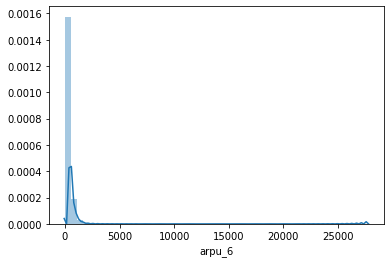

In [35]:
univariate(telecom.arpu_6)

## Bivariate EDA

In [36]:
def set_plotting_variable(figure_title, xlabel, ylabel):
    
    plt.title(figure_title)
    plt.xlabel(xlabel, labelpad = 15)
    plt.ylabel(ylabel, labelpad = 10)

In [37]:
def plot_bivariate(y_axis):
    
    plt.figure(figsize = (15, 5))
    
    xlabel = "Churn"
    x_axis = "churn"
    
    title_1 = "Month 6 - " + xlabel
    title_2 = "Month 7 - " + xlabel
    title_3 = "Month 8 - " + xlabel
    
    print("\nData Visualization of churn vs " + y_axis)

    # Subplot - 1
    plt.subplot(1, 3, 1)

    sns.boxplot(x = x_axis, y = y_axis + "_6", hue = "churn", data = telecom1, showfliers = False)
    #sns.barplot(x = x_axis, y = y_axis + "_6", hue = "churn", data = telecom1)
    # Call Custom Function
    set_plotting_variable(title_1, xlabel, y_axis + "_6")

    # Subplot - 2
    plt.subplot(1, 3, 2)

    sns.boxplot(x = x_axis, y = y_axis + "_7", hue = "churn", data = telecom1, showfliers = False)
    #sns.barplot(x = x_axis, y = y_axis + "_7", hue = "churn", data = telecom1)
    # Call Custom Function
    set_plotting_variable(title_2, xlabel, y_axis + "_7")
    
    # Subplot - 3
    plt.subplot(1, 3, 3)

    sns.boxplot(x = x_axis, y = y_axis + "_8", hue = "churn", data = telecom1, showfliers = False)
    #sns.barplot(x = x_axis, y = y_axis + "_8", hue = "churn", data = telecom1)
    # Call Custom Function
    set_plotting_variable(title_3, xlabel, y_axis + "_8")
    
    plt.subplots_adjust(wspace = 0.4)
    plt.show()


Data Visualization of churn vs arpu


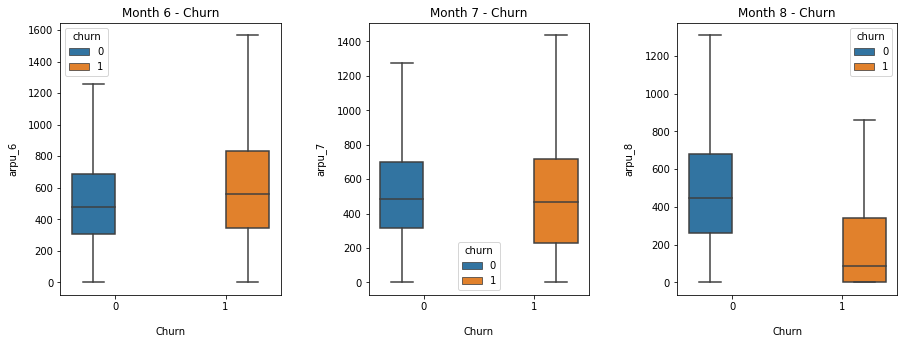


Data Visualization of churn vs onnet_mou


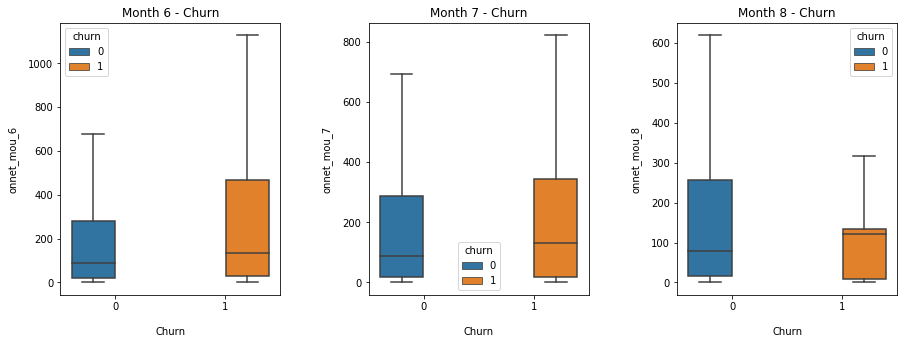


Data Visualization of churn vs offnet_mou


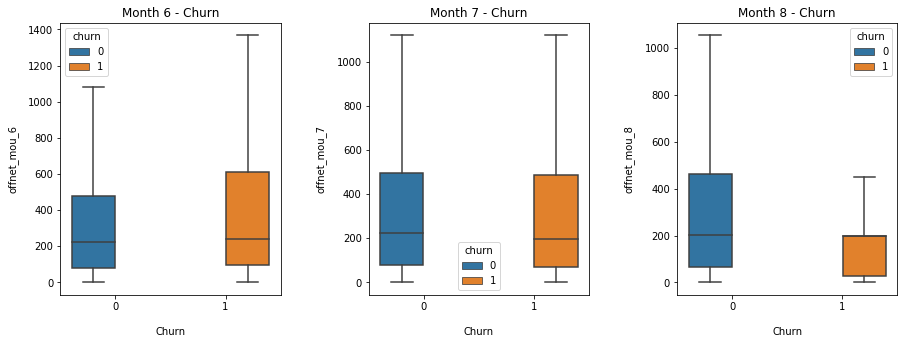


Data Visualization of churn vs total_og_mou


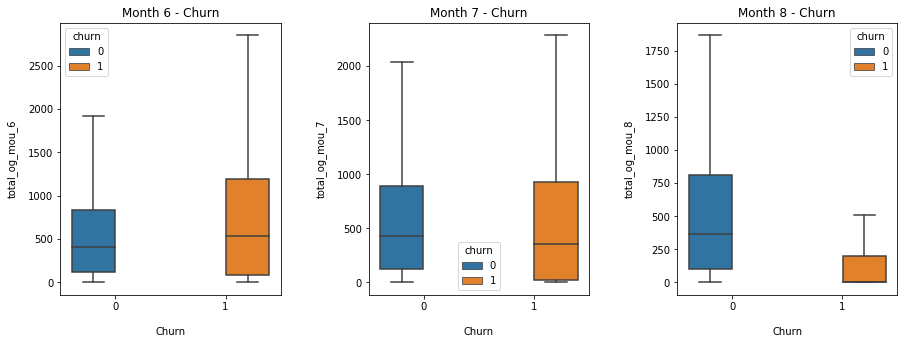


Data Visualization of churn vs total_ic_mou


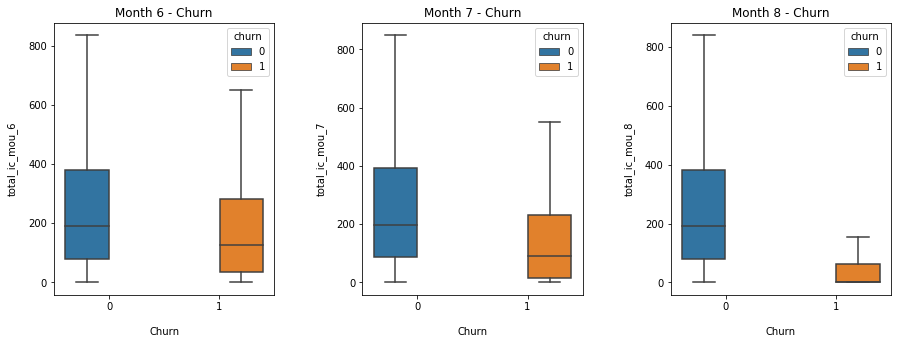


Data Visualization of churn vs total_rech_num


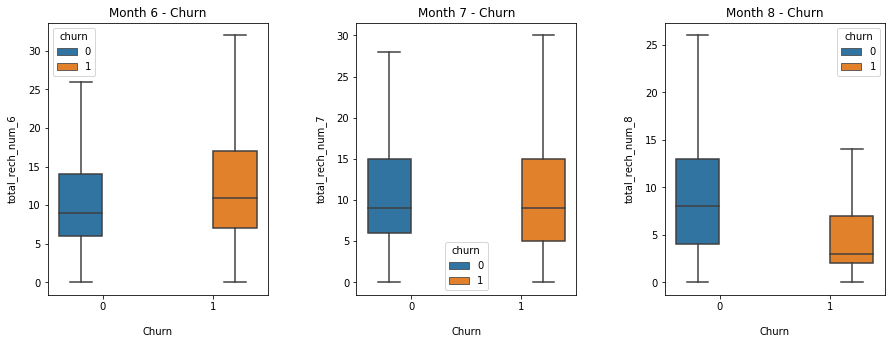


Data Visualization of churn vs total_rech_amt


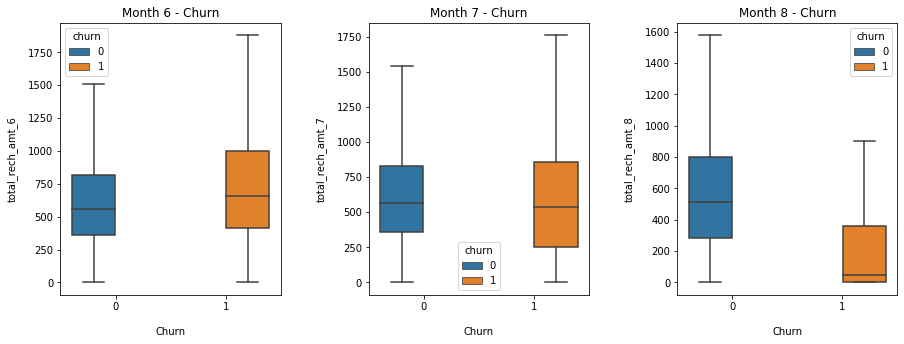


Data Visualization of churn vs total_rech_data


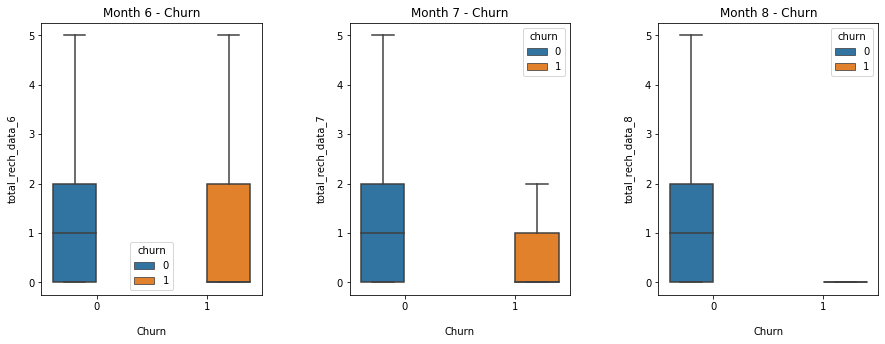


Data Visualization of churn vs vol_2g_mb


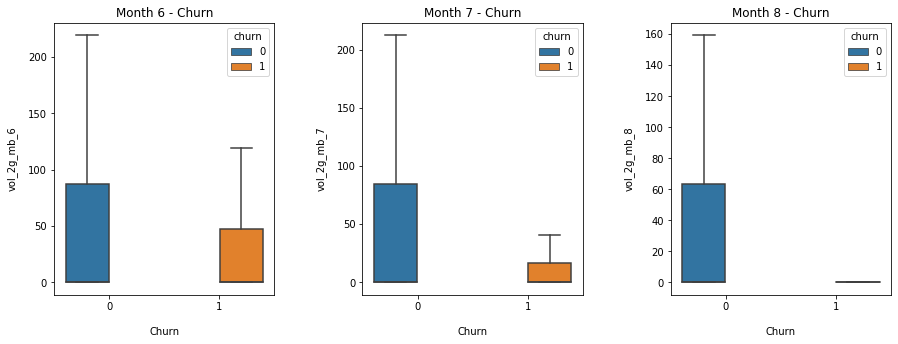


Data Visualization of churn vs vol_3g_mb


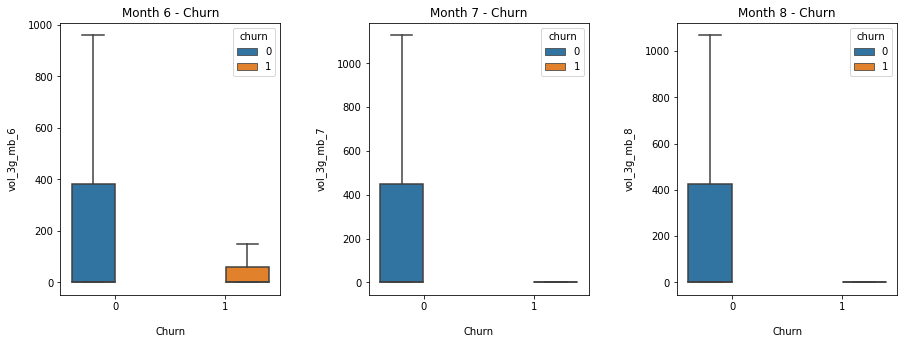


Data Visualization of churn vs vbc_3g


ValueError: Could not interpret input 'vbc_3g_6'

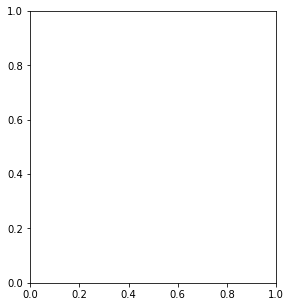

In [39]:
plot_bivariate("arpu")

plot_bivariate("onnet_mou")

plot_bivariate("offnet_mou")

plot_bivariate("total_og_mou")

plot_bivariate("total_ic_mou")

plot_bivariate("total_rech_num")

plot_bivariate("total_rech_amt")

plot_bivariate("total_rech_data")

plot_bivariate("vol_2g_mb")

plot_bivariate("vol_3g_mb")

plot_bivariate("vbc_3g")

plot_bivariate("total_data_rech_amt")

In [ ]:
telecom.corr()

## data preprocessing 

In [40]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [41]:
# change churn to numeric
telecom1['churn'] = pd.to_numeric(telecom1['churn'])

In [42]:
# divide data into train and test
X = telecom1.drop("churn", axis = 1)
y = telecom1.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

# print shapes of train and test sets
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(7398,)

In [43]:
X_train.shape

(22193, 169)

In [44]:
y_train.shape

(22193,)

In [45]:
X_test.shape

(7398, 169)

In [46]:
y_test.shape

(7398,)


## Aggregating the categorical columns

In [47]:
# converting churn to a numeric data
telecom1['churn'] = pd.to_numeric(telecom1['churn'])
telecom1.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
0,197.385,214.816,213.803,133.058488,134.411928,0.00,198.656887,198.118103,0.00,9.983236,...,-0.047728,5.440,-1.5,-55.0,0.0,0.0,0.0,0.0,-9.975,-7.555
1,1069.180,1349.850,3171.480,57.840000,54.680000,52.29,453.430000,567.160000,325.91,16.230000,...,-0.105000,-163.510,2.0,2453.0,395.0,0.0,0.0,0.0,0.000,0.000
2,378.721,492.223,137.362,413.690000,351.030000,35.08,94.660000,80.630000,136.48,0.000000,...,0.000000,-49.635,-6.0,-399.0,-92.0,2.0,-54.0,-19.5,-177.970,-363.535
3,514.453,597.753,637.760,102.410000,132.110000,85.14,757.930000,896.680000,983.39,0.000000,...,0.000000,91.550,3.0,78.0,0.0,0.0,0.0,0.0,0.000,0.000
4,74.350,193.897,366.966,48.960000,50.660000,33.58,85.410000,89.360000,205.89,0.000000,...,0.000000,127.095,0.0,212.0,89.5,1.0,89.5,92.0,-0.230,710.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29586,384.316,255.405,393.474,78.680000,29.040000,103.24,56.130000,28.090000,61.44,0.000000,...,-0.065000,8.830,0.0,200.0,0.0,0.0,0.0,0.0,34.155,367.885
29587,328.594,202.966,118.707,423.990000,181.830000,5.71,39.510000,39.810000,18.26,0.000000,...,-0.215000,-3.785,0.0,-162.5,-70.0,2.5,-75.0,-20.5,-784.555,0.000
29588,644.973,455.228,564.334,806.730000,549.360000,775.41,784.760000,617.130000,595.44,0.000000,...,0.000000,58.505,-4.0,-823.5,-643.0,0.0,9.5,9.5,-18.875,-5.895
29589,312.558,512.932,402.080,199.890000,174.460000,2.46,175.880000,277.010000,248.33,0.000000,...,0.000000,546.860,-3.0,37.0,52.0,0.5,77.0,77.0,0.790,671.960


In [48]:
train = pd.concat([X_train, y_train], axis=1)

# aggregate the categorical variables
train.groupby('night_pck_user_6').churn.mean()
train.groupby('night_pck_user_7').churn.mean()
train.groupby('night_pck_user_8').churn.mean()
train.groupby('fb_user_6').churn.mean()
train.groupby('fb_user_7').churn.mean()
train.groupby('fb_user_8').churn.mean()

fb_user_8
-1.0    0.137000
 0.0    0.069558
 1.0    0.024440
Name: churn, dtype: float64

In [49]:
# replace categories with aggregated values in each categorical column
mapping = {'night_pck_user_6' : {-1: 0.099165, 0: 0.066797, 1: 0.087838},
           'night_pck_user_7' : {-1: 0.115746, 0: 0.055494, 1: 0.051282},
           'night_pck_user_8' : {-1: 0.141108, 0: 0.029023, 1: 0.016194},
           'fb_user_6'        : {-1: 0.099165, 0: 0.069460, 1: 0.067124},
           'fb_user_7'        : {-1: 0.115746, 0: 0.059305, 1: 0.055082},
           'fb_user_8'        : {-1: 0.141108, 0: 0.066887, 1: 0.024463}
          }
X_train.replace(mapping, inplace = True)
X_test.replace(mapping, inplace = True)

# checking if categorical columns are all numeric
X_train[[col for col in catcols if col not in ['churn']]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22193 entries, 17725 to 11665
Data columns (total 6 columns):
night_pck_user_6    22193 non-null float64
night_pck_user_7    22193 non-null float64
night_pck_user_8    22193 non-null float64
fb_user_6           22193 non-null float64
fb_user_7           22193 non-null float64
fb_user_8           22193 non-null float64
dtypes: float64(6)
memory usage: 1.2 MB


In [50]:
X_train.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
# apply pca to train data
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])
np.where(X_train.values >= np.finfo(np.float64).max)

(array([], dtype=int64), array([], dtype=int64))

In [51]:
X_test.fillna(X_test.mean())

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
10656,675.460,556.500,725.676,831.41,866.81,708.79,14.03,31.69,69.64,0.00,...,0.00,-156.285,-0.5,198.5,17.5,0.5,25.5,25.5,25.440,136.360
24453,300.660,774.091,980.045,11.96,12.26,16.83,182.98,263.98,517.49,0.00,...,0.00,81.150,-7.0,-262.0,147.0,0.5,49.0,148.0,-5.070,795.060
26152,185.437,37.142,118.939,0.00,0.00,0.00,7.98,0.89,2.15,0.00,...,0.00,6.500,2.5,11.5,-31.0,3.5,-31.0,29.0,-203.550,0.000
17890,13.470,446.971,368.302,0.00,0.36,3.53,6.38,12.08,26.18,0.00,...,0.00,0.070,3.5,268.5,126.0,0.0,126.0,53.5,-13.265,741.375
18289,239.902,489.992,205.602,19.88,67.58,35.41,71.13,153.53,81.24,7.14,...,-0.08,-48.715,-4.0,-87.5,77.0,-3.0,-5.0,-143.0,-520.690,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17015,666.059,395.217,425.309,43.16,83.99,54.58,175.34,68.06,109.29,0.00,...,0.00,16.820,-3.5,-330.5,-0.5,-0.5,0.0,-89.5,26.210,148.605
932,3959.954,3461.746,3327.711,9.83,80.01,37.06,487.56,368.54,415.01,0.00,...,0.00,-7.610,-9.5,-662.5,-70.0,0.0,0.0,0.0,0.000,0.000
22509,399.799,1175.263,1023.273,267.84,162.59,400.71,98.98,115.21,277.84,0.00,...,0.00,264.805,-1.0,359.5,-13.5,-0.5,126.0,-126.0,-30.940,-1237.995
14423,655.369,532.020,451.031,444.98,618.56,342.19,627.73,460.48,577.94,0.00,...,0.00,-95.120,-9.0,-156.0,20.0,-0.5,-7.0,-7.0,-20.995,0.000


In [64]:
X_train.isna().any()

arpu_6                   False
arpu_7                   False
arpu_8                   False
onnet_mou_6              False
onnet_mou_7              False
onnet_mou_8              False
offnet_mou_6             False
offnet_mou_7             False
offnet_mou_8             False
roam_ic_mou_6            False
roam_ic_mou_7            False
roam_ic_mou_8            False
roam_og_mou_6            False
roam_og_mou_7            False
roam_og_mou_8            False
loc_og_t2t_mou_6         False
loc_og_t2t_mou_7         False
loc_og_t2t_mou_8         False
loc_og_t2m_mou_6         False
loc_og_t2m_mou_7         False
loc_og_t2m_mou_8         False
loc_og_t2f_mou_6         False
loc_og_t2f_mou_7         False
loc_og_t2f_mou_8         False
loc_og_t2c_mou_6         False
loc_og_t2c_mou_7         False
loc_og_t2c_mou_8         False
loc_og_mou_6             False
loc_og_mou_7             False
loc_og_mou_8             False
std_og_t2t_mou_6         False
std_og_t2t_mou_7         False
std_og_t

In [65]:
np.where(X_train.values >= np.finfo(np.float64).max)


pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

In [66]:
X_train.replace([np.inf, -np.inf], np.nan)

X_train.dropna(inplace=True)
y_train.replace([np.inf, -np.inf], np.nan)
y_train.dropna(inplace=True)

## Random forest before pca


In [67]:
# random forest where class weight adjusts cost function and handles class imbalance
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# creating 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [68]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   27.2s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight={0: 0.1, 1: 0.9},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False,
                                

In [69]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8828740665932013
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 0.4}


In [81]:
y_pred = model.predict(X_test)

# create onfusion matrix
conmat = confusion_matrix(y_test, y_pred)
print(conmat)

[[6719   93]
 [ 330  256]]


In [82]:
from sklearn.metrics import confusion_matrix 
TP = conmat[1,1] # true positive 
TN = conmat[0,0] # true negatives
FP = conmat[0,1] # false positives
FN = conmat[1,0] # false negatives

In [83]:
#Sensitivity
TP/(TP+FN)

0.43686006825938567

In [84]:
#Specificity
TN/(TN+FP)

0.9863476218438051

In [85]:
# predictors
feat = telecom1.drop('churn', axis=1).columns

# feature_importance
imp = rf_model.feature_importances_

# create dataframe
feat_imp = pd.DataFrame({'variables': feat, 'importance_percentage': imp*100})
feat_imp = feat_imp[['variables', 'importance_percentage']]

# sort features
feat_imp = feat_imp.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feat_imp.importance_percentage.sum())
feat_imp

NameError: name 'rf_model' is not defined

In [86]:

def perform_PCA(X):
    
    pca = PCA(svd_solver = 'randomized', random_state = 100)

    pca.fit(X)
    
    fig = plt.figure(figsize = (12,8))

    plt.plot(np.cumsum(pca.explained_variance_ratio_))

    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.show()

In [87]:
def perform_incremental_PCA(X_train, y_train, components):
    
    #Incremental PCA used for efficiency

    pca_final = IncrementalPCA(n_components = components)

    X_train_pca = pca_final.fit_transform(X_train)
    X_test_pca = pca_final.transform(X_test)

    X_train_pca = pd.DataFrame(data = X_train_pca)
    X_test_pca = pd.DataFrame(data = X_test_pca)

    print(X_train_pca.shape)
    print(y_train.shape)
    print(X_test_pca.shape)
    print(y_test.shape)
    
    #creating correlation matrix for the principal components
    corrmat = np.corrcoef(X_train_pca.transpose())

    #plotting the correlation matrix
    plt.figure(figsize = (20,10))
    sns.heatmap(corrmat, annot = True)
    plt.show()
    
    # 1s -> 0s in diagonals
    corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
    print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
    # we see that correlations are indeed very close to 0
    
    return X_train_pca, X_test_pca

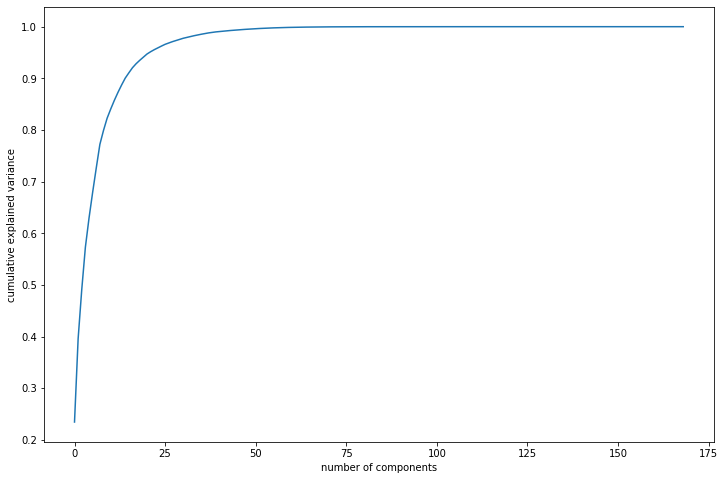

In [88]:
perform_PCA(X_train)

## PCA and logistic regression

In [89]:
# create pipeline
PCA_VARS = 50
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [90]:
X_train.shape

(22193, 169)

In [91]:
y_train.shape

(22193,)

In [92]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.7953408732483216

### test data evaluation

In [93]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
confusion = metrics.confusion_matrix(y_test, y_pred )
print(confusion)

[[5345 1467]
 [  95  491]]


In [94]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [95]:
#Sensitivity
TP/(TP+FN)

0.8378839590443686

In [96]:
#Specificity
TN/(TN+FP)

0.7846447445684087

at 83% and 78% the sensitivity and specificity are good in this model

In [97]:
# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

AUC:    	 0.88


In [98]:
# class imbalance
y_train.value_counts()/y_train.shape

0    0.920876
1    0.079124
Name: churn, dtype: float64

In [99]:
# PCA
pca = PCA()

logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]
pca_logistic = Pipeline(steps)
params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [ ]:
# fit model
model.fit(X_train, y_train)

In [ ]:
# cross validation results
pd.DataFrame(model.cv_results_)

In [102]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8747937433758003
Best hyperparameters:  {'logistic__C': 3, 'logistic__penalty': 'l2', 'pca__n_components': 80}


In [103]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix 
confusion = metrics.confusion_matrix(y_test, y_pred )
print(confusion)

[[5345 1467]
 [  95  491]]


In [104]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [105]:
#Sensitivity
TP/(TP+FN)

0.8378839590443686

In [106]:
#Specificity
TN/(TN+FP)

0.7846447445684087

### creating random forest

In [107]:
# random forest 
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [108]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   28.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight={0: 0.1, 1: 0.9},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False,
                                

In [109]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8792034853047535
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 0.4}


In [110]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
conmat = confusion_matrix(y_test, y_pred)
print(conmat)

[[6721   91]
 [ 340  246]]


In [111]:
TP = conmat[1,1] # true positive 
TN = conmat[0,0] # true negatives
FP = conmat[0,1] # false positives
FN = conmat[1,0] # false negatives

In [112]:
#Sensitivity
TP/(TP+FN)

0.4197952218430034

In [113]:
#Specificity
TN/(TN+FP)

0.9866412213740458

In [114]:
# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

AUC:    	 0.88


### best feature selection

In [115]:
#random forest model on train data
max_features = int(round(np.sqrt(X_train.shape[1])))
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

13


In [116]:
# fit model
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   16.6s finished


RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
                       criterion='gini', max_depth=None, max_features=13,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=True,
                       random_state=4, verbose=1, warm_start=False)

In [117]:
# OOB score
rf_model.oob_score_

0.9429099265534178

In [118]:
# predict churn on test data
y_pred = rf_model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


[[6726   86]
 [ 337  249]]
ROC:    	 0.93


In [119]:
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

In [120]:
#Sensitivity
TP/(TP+FN)

0.4249146757679181

In [121]:
#Specificity
TN/(TN+FP)

0.9873752201996476

The sensitivity is very low at 40% so we don't use this model

### feature importance

In [122]:
# predictors
feat = telecom1.drop('churn', axis=1).columns

# feature_importance
imp = rf_model.feature_importances_

# create dataframe
feat_imp = pd.DataFrame({'variables': feat, 'importance_percentage': imp*100})
feat_imp = feat_imp[['variables', 'importance_percentage']]

# sort features
feat_imp = feat_imp.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feat_imp.importance_percentage.sum())
feat_imp

Sum of importance= 100.00000000000001


,variables,importance_percentage
0,roam_ic_mou_8,5.578019
1,total_ic_mou_8,5.241246
2,roam_og_mou_8,4.012461
3,total_og_mou_8,3.783484
4,last_day_rch_amt_8,3.656384
5,total_rech_amt_diff,3.429739
6,arpu_diff,2.953791
7,total_rech_amt_8,2.627077
8,max_rech_amt_8,2.547272
9,arpu_8,2.517461


### top 20 features

In [123]:
top_num = 25
top_features = feat_imp.variables[0:top_num]

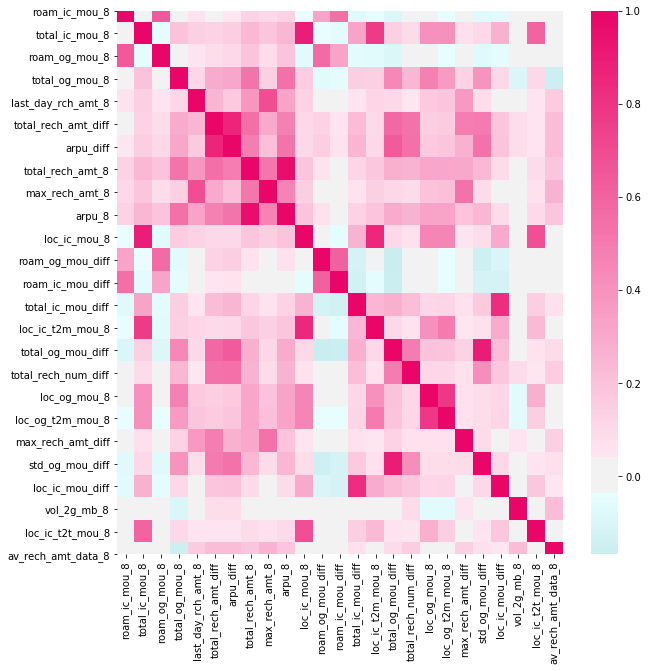

In [124]:
# feature correlation
import seaborn as sns
plt.rcParams["figure.figsize"] =(10,10)
mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=X_train[top_features].corr(), center=0.0, cmap=mycmap)

In [125]:
top_features = ['roam_ic_mou_8', 'total_ic_mou_8', 'roam_og_mou_8', 'total_og_mou_8', 'last_day_rch_amt_8', 'total_rech_amt_diff', 
                'total_rech_amt_diff', 'arpu_diff', 'total_rech_amt_8']
X_train = X_train[top_features]
X_test = X_test[top_features]

In [126]:
# logistic regression
steps = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))
        ]
logistic = Pipeline(steps)
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [127]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    3.1s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight={0: 0.1,
                                                                         1: 0.9},
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ra

In [128]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8633132991272635
Best hyperparameters:  {'logistic__C': 0.5, 'logistic__penalty': 'l1'}


In [129]:
# predict churn on test data
y_pred = model.predict(X_test)

# create confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[5783 1029]
 [ 123  463]]
ROC:    	 0.87


In [130]:
TP = matrix[1,1] # true positive 
TN = matrix[0,0] # true negatives
FP = matrix[0,1] # false positives
FN = matrix[1,0] # false negatives

In [131]:
#Sensitivity
TP/(TP+FN)

0.7901023890784983

In [132]:
#Specificity
TN/(TN+FP)

0.8489430416911333

### extracting intercepts and coefficients

In [133]:
logistic_model = model.best_estimator_.named_steps['logistic']

In [134]:
# intercept
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])

In [135]:
# coefficients
coefficients = logistic_model.coef_.reshape((9, 1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(X_train.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_features)

In [136]:
# concatenate dataframes
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

,intercept,roam_ic_mou_8,total_ic_mou_8,roam_og_mou_8,total_og_mou_8,last_day_rch_amt_8,total_rech_amt_diff,total_rech_amt_diff,arpu_diff,total_rech_amt_8
0,-1.355846,0.096704,-1.602786,0.270587,-0.085299,-0.349694,-0.080972,-0.339962,-0.518597,0.0


## inference:

According to this model the company needs to focus mainly on the roaming rates for both incoming and outgoing call rates based on minutes of usage and keep the pricing competitive. Also the total minutes of usage for blth incoming and outgoing along with recharge amount are important influencers and indicators. 

## linear regression model

In [137]:
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [138]:
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import re

lm = LinearRegression()


lm.fit(X_train, y_train)
lin = LinearRegression()
r1 = RFE(lm, 15)


r1.fit(X_train, y_train)

print(r1.ranking_) 
print(r1.support_)           
 

[1 1 1 1 1 1 1 1 1]
[ True  True  True  True  True  True  True  True  True]


## feature selection

In [139]:
import statsmodels.api as sm 

In [140]:
c1 = X_train.columns[r1.support_]
X_train_r1 = X_train[c1]

In [141]:
X_train_r1 = sm.add_constant(X_train_r1)
X_train_r1.head()

,const,roam_ic_mou_8,total_ic_mou_8,roam_og_mou_8,total_og_mou_8,last_day_rch_amt_8,total_rech_amt_diff,total_rech_amt_diff,total_rech_amt_diff,total_rech_amt_diff,arpu_diff,total_rech_amt_8
17725,1.0,0.00,169.43,0.0,761.71,10,-90.0,-90.0,-90.0,-90.0,-53.020,476
20867,1.0,0.71,0.00,0.0,0.00,0,-298.5,-298.5,-298.5,-298.5,-288.993,0
14319,1.0,0.00,1392.31,0.0,725.91,20,-278.0,-278.0,-278.0,-278.0,-221.733,812
15560,1.0,0.00,61.73,0.0,617.46,0,-263.0,-263.0,-263.0,-263.0,-208.945,426
9978,1.0,0.00,998.06,0.0,35.19,46,-177.5,-177.5,-177.5,-177.5,-232.273,300


In [142]:
lin_mod2 = sm.OLS(y_train, X_train_r1).fit()   
print(lin_mod2.summary())

                            OLS Regression Results                            
Dep. Variable:                  churn   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     344.1
Date:                Mon, 06 Jul 2020   Prob (F-statistic):               0.00
Time:                        19:33:16   Log-Likelihood:                -1128.8
No. Observations:               22193   AIC:                             2276.
Df Residuals:                   22184   BIC:                             2348.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0962    

In [143]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_r1.columns
vif['VIF'] = [variance_inflation_factor(X_train_r1.values, i) for i in range(X_train_r1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,total_rech_amt_diff,inf
7,total_rech_amt_diff,inf
8,total_rech_amt_diff,inf
9,total_rech_amt_diff,inf
10,arpu_diff,4.12
0,const,3.14
11,total_rech_amt_8,2.13
3,roam_og_mou_8,1.76
1,roam_ic_mou_8,1.71
4,total_og_mou_8,1.45


In [144]:
from sklearn.feature_selection import RFE
#fitting with 10 features

lin_mod3 = LinearRegression()
r2 = RFE(lin_mod3 , 10)


r2.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=10, step=1, verbose=0)

In [145]:
# feature selection
c2 = X_train.columns[r2.support_]

# Subsetting training data
X_train_r2 = X_train[c2]

# Add a constant 
X_train_r2 = sm.add_constant(X_train_r2)

# Fitting  10 variables
lin_mod3 = sm.OLS(y_train, X_train_r2).fit()   
print(lin_mod3.summary())

                            OLS Regression Results                            
Dep. Variable:                  churn   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     344.1
Date:                Mon, 06 Jul 2020   Prob (F-statistic):               0.00
Time:                        19:33:17   Log-Likelihood:                -1128.8
No. Observations:               22193   AIC:                             2276.
Df Residuals:                   22184   BIC:                             2348.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0962    

In [146]:
ytp = lin_mod3.predict(X_train_r2)

Text(0.5, 0, 'Errors')

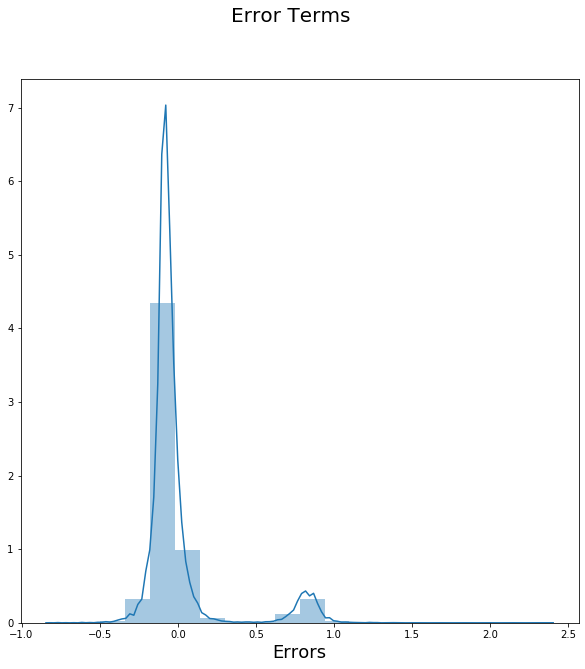

In [147]:

fig = plt.figure()
sns.distplot((y_train - ytp), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

In [148]:
c2

Index(['roam_ic_mou_8', 'total_ic_mou_8', 'roam_og_mou_8', 'total_og_mou_8',
       'last_day_rch_amt_8', 'total_rech_amt_diff', 'total_rech_amt_diff',
       'arpu_diff', 'total_rech_amt_8'],
      dtype='object')

In [149]:
X_test_r2 = X_test[c2]

In [150]:
X_test_r2 = sm.add_constant(X_test_r2)
X_test_r2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7398 entries, 10656 to 2801
Data columns (total 12 columns):
const                  7398 non-null float64
roam_ic_mou_8          7398 non-null float64
total_ic_mou_8         7398 non-null float64
roam_og_mou_8          7398 non-null float64
total_og_mou_8         7398 non-null float64
last_day_rch_amt_8     7398 non-null int64
total_rech_amt_diff    7398 non-null float64
total_rech_amt_diff    7398 non-null float64
total_rech_amt_diff    7398 non-null float64
total_rech_amt_diff    7398 non-null float64
arpu_diff              7398 non-null float64
total_rech_amt_8       7398 non-null int64
dtypes: float64(10), int64(2)
memory usage: 751.4 KB


In [151]:
yp = lin_mod3.predict(X_test_r2)

In [152]:
#r2 score
from sklearn.metrics import r2_score
r2_score(y_test, yp)

0.11812547701541432

Text(0, 0.5, 'yprediction')

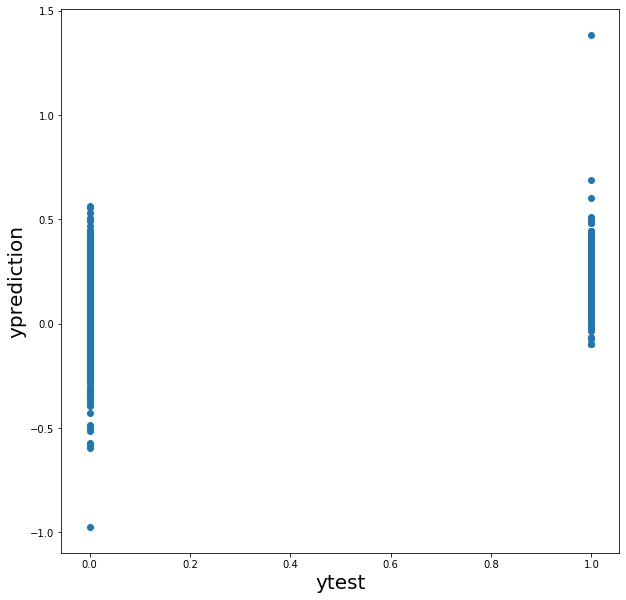

In [153]:
fig = plt.figure()
plt.scatter(y_test, yp)
            
plt.xlabel('ytest', fontsize = 20)                          # X-label
plt.ylabel('yprediction', fontsize = 20) 

In [154]:
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [155]:
x=y_test.index

In [159]:
table=pd.DataFrame()

In [160]:
table['predictions']=y_pred

In [161]:
table['actual']=y_test

In [162]:
b=list(x)

In [163]:
table['index']=b

In [164]:
table.head()

,predictions,actual,index
0,0,1.0,10656
1,0,NaN,24453
2,0,NaN,26152
3,0,NaN,17890
4,0,NaN,18289


## final table for the prediction using the linear regression model :

In [165]:
table

,predictions,actual,index
0,0,1.0,10656
1,0,NaN,24453
2,0,NaN,26152
3,0,NaN,17890
4,0,NaN,18289
...,...,...,...
7393,0,NaN,17015
7394,1,NaN,932
7395,0,NaN,22509
7396,0,NaN,14423


In [166]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-1.1349836365859085

#### Even though the linear regression model is not providing proper r2 score we can still observe it has done ann okay analysis to select churn data.

also we can observe that linear regression is not the best model for this data and we can make use of random forest and logistic regression using PCA to get the important features and churn customers.